# Loading Dataset


In [ ]:
# Online Retail 2 is orginially xlsx and with two sheets of data that has been
# combined into one sheet.
# subsequently .xlsx file converted to .csv

# Drive folder and uploading dataset 
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# importing the .csv dataset file 
# online retail dataset has been placed in google drive for easier access 

import pandas as pd
df = pd.read_csv("drive/MyDrive/online_retail_II.csv",
                 encoding= 'unicode_escape')

In [ ]:
# Preliminary viewing of dataset
print(df.shape)
print(df.columns)

(1048575, 8)
Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')


In [ ]:
# Preliminary viewing of dataset
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01/12/2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323,PINK CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323,WHITE CHERRY LIGHTS,12,01/12/2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01/12/2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01/12/2009 07:45,1.25,13085.0,United Kingdom


## Data Cleaning










In [ ]:
# Statistical observations & calculations from the integer & float columns only
df.describe()

,Quantity,Price,Customer ID
count,1.048575e+06,1.048575e+06,811893.000000
mean,9.957524e+00,4.627347e+00,15324.711706
std,1.335187e+02,1.228024e+02,1697.032430
min,-7.421500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13971.000000
50%,3.000000e+00,2.100000e+00,15260.000000
75%,1.000000e+01,4.150000e+00,16795.000000
max,7.421500e+04,3.897000e+04,18287.000000


In [ ]:
# Basics of the dataset and if manipluation is needed 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1048575 non-null  object 
 1   StockCode    1048575 non-null  object 
 2   Description  1044203 non-null  object 
 3   Quantity     1048575 non-null  int64  
 4   InvoiceDate  1048575 non-null  object 
 5   Price        1048575 non-null  float64
 6   Customer ID  811893 non-null   float64
 7   Country      1048575 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 64.0+ MB


In [ ]:
# Column name manipulation
# all 8 column names are fine however 'Price' does not include a unit.
# prices involve in dataframe are pound sterling
df.rename(columns = {'Customer ID': 'Customer_ID'}, inplace = True)
df.rename(columns = {'Price': 'Price (£)'}, inplace = True)
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price (£)', 'Customer_ID', 'Country'],
      dtype='object')

In [ ]:
# Number of different cases in each variable 
print('The unique numbers of each variable:')
print(df.nunique())

The unique numbers of each variable:
Invoice        52961
StockCode       5310
Description     5692
Quantity        1048
InvoiceDate    47046
Price (£)       2784
Customer_ID     5924
Country           43
dtype: int64


In [ ]:
# Identifying the NaN and missingness
df.isna().sum()
# Huge amount of unknowns within cusomer ID.
# This is looked at in detail within R as an assumtion is that are they errors
# within the system or are they retail customers that were unregistered when
# making a purchase? 

# To have 1/4 of the data as unknowns is a large amount, especailly when
# the number of unknown customer ID's is close to 240,000.
# An assumtion is that these unnown customers are probably unregistered retail
# customers that don't buy regulary and thus don't have an account with the
# ecommerce platform.
# Constulting the owners on the ecommerce site to verify this assumption would
# be ideal and the next step in a future case.

Invoice             0
StockCode           0
Description      4372
Quantity            0
InvoiceDate         0
Price (£)           0
Customer_ID    236682
Country             0
dtype: int64

In [ ]:
# Viewing missingness, Customer ID missingness
df[df['Customer_ID'].isna()].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
263,489464,21733,85123a mixed,-96,01/12/2009 10:52,0.0,NaN,United Kingdom
283,489463,71477,short,-240,01/12/2009 10:52,0.0,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,01/12/2009 10:53,0.0,NaN,United Kingdom


In [ ]:
# Viewing missingness, description missingness
df[df['Description'].isna()].tail(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
1046793,580359,20775,NaN,-35,02/12/2011 16:11,0.0,NaN,United Kingdom
1047620,580379,72225C,NaN,-144,02/12/2011 17:57,0.0,NaN,United Kingdom
1047622,580381,21758,NaN,-9,02/12/2011 17:58,0.0,NaN,United Kingdom


In [ ]:
# Viewing shape of NaNs
nan_data = df[df.isna().any(axis = 1)]
nan_data.shape

(236682, 8)

In [ ]:
# Finding percentage of dataset with NaNs
nan_data_frac = nan_data.shape[0]/df.shape[0]*100
print(f'{round(nan_data_frac)}% of the data consists of null values')

23% of the data consists of null values


In [ ]:
# Renaming the missing customer ID elements and involving these customers for 
# the visualisations and investigation
df['Customer_ID'].fillna('unk.', inplace = True)
print(df.isna().sum())

Invoice           0
StockCode         0
Description    4372
Quantity          0
InvoiceDate       0
Price (£)         0
Customer_ID       0
Country           0
dtype: int64


In [ ]:
ID = df['Customer_ID'].nunique()
print(f"There are {ID} different customers ID's (including the unknown (unk.) customer notation)")

There are 5925 different customers ID's (including the unknown (unk.) customer notation)


In [ ]:
# Removing missing values as irrelevant to investigation 
df.dropna(inplace = True)
# to check 
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price (£)      0
Customer_ID    0
Country        0
dtype: int64

In [ ]:
# Formatting 'Customer ID' and 'Invoice' variables
df['Customer_ID'] = df['Customer_ID'].astype('str')
# string date to datetime, also american date to UK standard date
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst = True)
# further date manipulation
df['InvoiceDate'] = df['InvoiceDate'].dt.strftime('%Y-%m-%d %H:%M')

In [ ]:
# Checking date
print(df['InvoiceDate'].head())

0    2009-12-01 07:45
1    2009-12-01 07:45
2    2009-12-01 07:45
3    2009-12-01 07:45
4    2009-12-01 07:45
Name: InvoiceDate, dtype: object


In [ ]:
# Viewing the results of the above manipulation
print(df['Customer_ID'].head(5)) 
# decimal point unfortunate
# To fix this:
df['Customer_ID'] = df['Customer_ID'].str[:5]
print(df['Customer_ID'].head(5))

0    13085.0
1    13085.0
2    13085.0
3    13085.0
4    13085.0
Name: Customer_ID, dtype: object
0    13085
1    13085
2    13085
3    13085
4    13085
Name: Customer_ID, dtype: object


In [ ]:
# Removing the capitals from the elements within in the 'Description' variable.
df["Description"]= df["Description"].str.lower()
df['Description'] = df['Description'].str.strip()
df['Description'].head(5)

0    15cm christmas glass ball 20 lights
1                     pink cherry lights
2                    white cherry lights
3            record frame 7" single size
4         strawberry ceramic trinket box
Name: Description, dtype: object

In [ ]:
# Viewing the negative values in the integer and float variables,
# (suspected -ve indicates cancelled orders) 

# Viewing the negative values in 'Quantity' column
cancelled = df[df['Quantity']<0].shape[0] # suspected no. of cancelled orders
df[df['Quantity']<0].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
178,C489449,22087,paper bunting white lace,-12,2009-12-01 10:33,2.95,16321,Australia
179,C489449,85206A,cream felt easter egg basket,-6,2009-12-01 10:33,1.65,16321,Australia
180,C489449,21895,potting shed sow 'n' grow set,-4,2009-12-01 10:33,4.25,16321,Australia


In [ ]:
# following from above
print(f'There are, {cancelled} suspected cancelled orders within the dataset.')

There are, 20009 suspected cancelled orders within the dataset.


In [ ]:
# Here 'Quantity' data is prepared for visualisation
df_quantity_nve = df[df['Quantity']<0]
df_quantity_nve = df_quantity_nve.drop(["Invoice", "StockCode", "Description",
                                'Price (£)', 'InvoiceDate',
                                'Customer_ID'], axis = 1) 
df_quantity_nve.reset_index(drop = True, inplace = True)
df_quantity_nve = df_quantity_nve.sort_values('Quantity', ascending = True)
# For simplicity small negative quantities are filtered out
df_quantity_nve = df_quantity_nve[df_quantity_nve['Quantity'] < -3500]

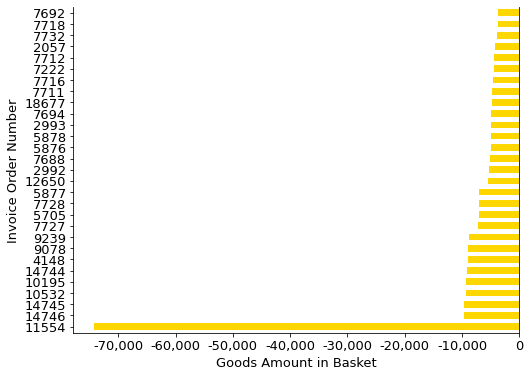

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualisaion of all -ve quantity values within the dataset
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib

fig, ax = plt.subplots(1, 1, figsize = (8, 6))
df_quantity_nve.plot(kind = 'barh' , width = 0.6, ax=ax,
                     linewidth = 1.2, color = 'gold')
plt.xlabel('Goods Amount in Basket')
plt.ylabel('Invoice Order Number')
#plt.suptitle('Capture of the largest negative \n quantities within the dataset ')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax.xaxis.set_major_formatter(tick) 
ax.spines['top'].set_visible(False) # remove borders
#ax.spines['right'].set_visible(False)
ax.get_legend().remove()
fig1 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
# FIG 1
fig1.savefig('fig1_data_cleaning.png', dpi = 100) 

In [ ]:
# Viewing the negative values in 'Price' column
print(df[df['Price (£)']<0].shape)
df[df['Price (£)']<0].head(5)
# small number of negative price elements though all are linked to the stock code 
# description 'adjust bad debt'
# Here it becomes apparent that there is also some strange StockCode elements
# within the dataset which are dealt with after.

(5, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
179403,A506401,B,adjust bad debt,1,2010-04-29 13:36,-53594.36,unk.,United Kingdom
276274,A516228,B,adjust bad debt,1,2010-07-19 11:24,-44031.79,unk.,United Kingdom
403472,A528059,B,adjust bad debt,1,2010-10-20 12:04,-38925.87,unk.,United Kingdom
825444,A563186,B,adjust bad debt,1,2011-08-12 14:51,-11062.06,unk.,United Kingdom
825445,A563187,B,adjust bad debt,1,2011-08-12 14:52,-11062.06,unk.,United Kingdom


In [ ]:
# Cancelled orders
# Creating a function that will assign 0 to all  Invoice values without a 'C' 
# as first character, if the value does hold 'C' as first character then it's
# assigned to 1.
def cancelled_orders(row):
    x = 0
    if row['Invoice'][0] == 'C':
        x = 1
    return x

In [ ]:
# Creating a new column 'cancelled_orders' 
df['cancelled_orders'] = df.apply(cancelled_orders, axis = 1)
# checking to see the cancelled orders
df[df['cancelled_orders'] == 1].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country,cancelled_orders
178,C489449,22087,paper bunting white lace,-12,2009-12-01 10:33,2.95,16321,Australia,1
179,C489449,85206A,cream felt easter egg basket,-6,2009-12-01 10:33,1.65,16321,Australia,1
180,C489449,21895,potting shed sow 'n' grow set,-4,2009-12-01 10:33,4.25,16321,Australia,1


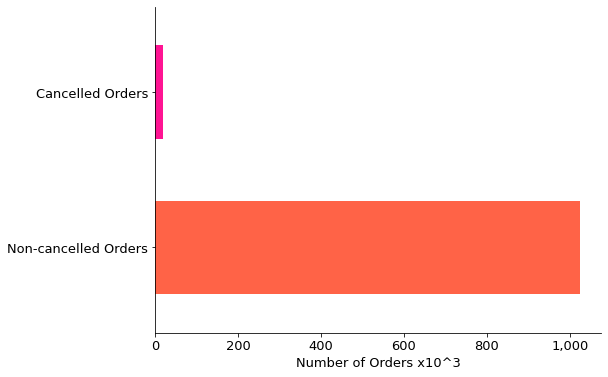

<Figure size 432x288 with 0 Axes>

In [ ]:
# Before removing the cancelled orders from the dataset for further processing, 
# there can be inspections done which may give interesting results.

# visualising the cancelled orders compared with the non-cancelled
c = df['cancelled_orders'].value_counts()
c = c /1000
# renaming
c = c.rename({0: 'Non-cancelled Orders', 1: 'Cancelled Orders'})

# plotting 
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
c.plot(kind = 'barh', width = 0.6, color = ['tomato', 'deeppink'],
       linewidth = 1.2)
plt.xlabel('Number of Orders x10^3')
#plt.suptitle('Cancelled Orders compared to non-cancelled')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax.xaxis.set_major_formatter(tick) 
ax.spines['top'].set_visible(False) # remove border
ax.spines['right'].set_visible(False)
#ax.get_legend().remove()
fig2 = plt.gcf()
plt.show()
plt.draw()  

In [ ]:
# FIG 2  
fig2.savefig('fig2_data_cleaning.png')

In [ ]:
# Another interesting observation can be made, the potential orders becoming
# cancelled rate.
# Calculating the probability of an order being cancelled
no_cancelled = df[df['cancelled_orders'] == 1].shape[0]
no_non_cancelled = df.shape[0] - no_cancelled
pco = (no_cancelled/ no_non_cancelled)
pco = round(pco*100)
print(f'During 25 months, {no_cancelled} orders were cancelled, resulting in \na cancellation rate of {pco}% for all orders placed')

During 25 months, 19261 orders were cancelled, resulting in 
a cancellation rate of 2% for all orders placed


In [ ]:
# checking the rows containing cancelled and negative values within 'Quantity'
df[df['Quantity']< 0 ].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country,cancelled_orders
178,C489449,22087,paper bunting white lace,-12,2009-12-01 10:33,2.95,16321,Australia,1
179,C489449,85206A,cream felt easter egg basket,-6,2009-12-01 10:33,1.65,16321,Australia,1
180,C489449,21895,potting shed sow 'n' grow set,-4,2009-12-01 10:33,4.25,16321,Australia,1


In [ ]:
# Removal of cancelled orders subsquently disgrading all rows with negative 
# values in 'Quantity' 
df = df[~df["Invoice"].astype(str).str.contains("C", na = False)]
df.shape # checking elements

(1024942, 9)

In [ ]:
# Disregarding cancelled orders variable from original dataframe.
df = df.drop(['cancelled_orders'], axis = 1)
print(df.shape)
df.columns

(1024942, 8)


Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price (£)', 'Customer_ID', 'Country'],
      dtype='object')

In [ ]:
# Checking duplicated observations/rows within dataset
print(f"There are {df.duplicated().sum()} duplicated observations.")
# viewing the duplicated obersavtions
dfduplicate = df[df.duplicated()]

There are 33654 duplicated observations.


In [ ]:
# Obversing duplicates
dfduplicate

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
371,489517,21912,vintage snakes & ladders,1,2009-12-01 11:34,3.75,16329,United Kingdom
383,489517,22130,party cone christmas decoration,6,2009-12-01 11:34,0.85,16329,United Kingdom
384,489517,22319,hairclips forties fabric assorted,12,2009-12-01 11:34,0.65,16329,United Kingdom
385,489517,21913,vintage seaside jigsaw puzzles,1,2009-12-01 11:34,3.75,16329,United Kingdom
386,489517,21821,glitter star garland with bells,1,2009-12-01 11:34,3.75,16329,United Kingdom
...,...,...,...,...,...,...,...,...
1048333,580469,23048,set of 10 lanterns fairy light star,1,2011-12-04 12:32,4.15,14583,United Kingdom
1048334,580469,21559,strawberry lunch box with cutlery,1,2011-12-04 12:32,2.55,14583,United Kingdom
1048348,580469,22079,ribbon reel hearts design,2,2011-12-04 12:32,1.65,14583,United Kingdom
1048509,580501,23438,red spot gift bag large,2,2011-12-04 13:00,1.25,14546,United Kingdom


In [ ]:
# However the duplicate rows hold different Product Description's.
# The identified duplicates are not real duplicates, thus, they are to be useful
dfduplicate['Description'].head(10)

371             vintage snakes & ladders
383      party cone christmas decoration
384    hairclips forties fabric assorted
385       vintage seaside jigsaw puzzles
386      glitter star garland with bells
390      s/4 pistachio lovebird coasters
391      set of three vintage gift wraps
394             vintage snakes & ladders
657         penny farthing birthday card
658               dinosaur birthday card
Name: Description, dtype: object

In [ ]:
# Checking of miscellaneous stock codes
# Among viewing the dataset manually it was noticed that there may be peculiar
# values within 'Stock code' variable.
stock_check = (~df['StockCode'].str.contains('[0-9]'))
strange_stock_codes = df.loc[stock_check]
strange_stock_codes.head(3)
# shows stock codes label 'POST' & 'M'

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
89,489439,POST,postage,3,2009-12-01 09:28,18.0,12682,France
126,489444,POST,postage,1,2009-12-01 09:55,141.0,12636,USA
173,489447,POST,postage,1,2009-12-01 10:10,130.0,12362,Belgium


In [ ]:
# To find all different types of peculiar stock codes that are not numeric
ssc = strange_stock_codes[['StockCode']]
strange_number = ssc.nunique()[0]
print(f'There are {strange_number} different types of peculiar stock code elements.')

There are 13 different types of peculiar stock code elements.


In [ ]:
# Displaying the peculiar stock code values within the dataframe:
print(f'The {strange_number} being;')
print(ssc.value_counts())
sum = ssc.value_counts().sum()
print(f'Total number of rows containing peculiar stock code numbers is {sum}.')

The 13 being;
StockCode   
POST            1847
DOT             1428
M                877
ADJUST            36
BANK CHARGES      34
DCGSSGIRL         24
DCGSSBOY          22
PADS              18
B                  6
m                  5
D                  5
AMAZONFEE          4
S                  3
dtype: int64
Total number of rows containing peculiar stock code numbers is 4309.


In [ ]:
# Setting first column name
ssc.columns = ['stock code']

In [ ]:
# Manipulating element names for visualisation 
ssc['stock code'] = ssc['stock code'].str.lower()
ssc['stock code'] = ssc['stock code'].str.strip()
ssc['stock code'] = ssc['stock code'].str.capitalize()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
# Renaming all columns
ssc_plot = ssc.value_counts()
ssc_plot = ssc_plot.reset_index()
ssc_plot.columns = ['Stock Code', 'Count']
# viewing newly made dataframe
ssc_plot

,Stock Code,Count
0,Post,1847
1,Dot,1428
2,M,882
3,Adjust,36
4,Bank charges,34
5,Dcgssgirl,24
6,Dcgssboy,22
7,Pads,18
8,B,6
9,D,5


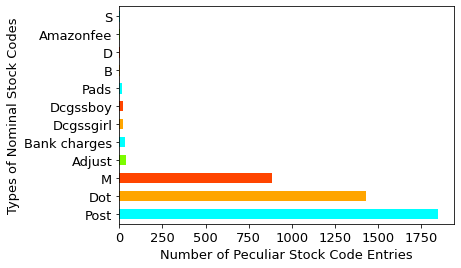

<Figure size 432x288 with 0 Axes>

In [ ]:
# Visualisation of the stock code findings
# x = 'Stock Code', y = 'Count',
#fig, ax = plt.subplots(1, 1, figsize = (8, 6))
ssc_plot.plot(kind = 'barh', x = 'Stock Code', y = 'Count',  zorder=2 ,
              width = 0.6, label = "",legend=None,
              color = ['cyan', 'orange', 'orangered',
                       'lawngreen', 'cyan', 'orange', 'orangered'],
         linewidth = 1.2)
plt.xlabel('Number of Peculiar Stock Code Entries')
plt.ylabel('Types of Nominal Stock Codes')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax.xaxis.set_major_formatter(tick) 
ax.spines['top'].set_visible(False) # remove border
ax.spines['right'].set_visible(False)
#plt.suptitle('Bar chart illustrating the non-numeric stock code elements')
#ax.get_legend().remove()
fig3 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
# FIG 3
fig3.savefig('fig3_data_cleaning.png', dpi = 100)

In [ ]:
# As there is a small number of strange stock code values they can be dropped
# from the dataframe for the further analysis.

# An assumption can be made that wih the customer lifetime value prediction
# and calculations, postage fees and additional bank charges are unimportant
#  and negligable.  
print(df.shape)
df = df.loc[~stock_check]
df.shape

(1024942, 8)


(1020633, 8)

In [ ]:
# Resetting dataframe index 
df.reset_index(drop= True, inplace = True)

In [ ]:
# Manually sorting through the data, noticed that within 'Country' variable two
# country abbreviations can be renamed to its full name
# Where EIRE is Ireland and RSA is South Africa. Replacing accordingly. 
df['Country'] = df['Country'].str.replace('EIRE','Republic of Ireland')
df['Country'] = df['Country'].str.replace('RSA','South Africa')
print(df[df['Country'] == 'Republic of Ireland'].head(3))
print(df[df['Country'] == 'South Africa'].head(3)) # checking code 

    Invoice StockCode  ... Customer_ID              Country
408  489520    35751C  ...       14911  Republic of Ireland
409  489520    72739B  ...       14911  Republic of Ireland
410  489520     22114  ...       14911  Republic of Ireland

[3 rows x 8 columns]
      Invoice StockCode  ... Customer_ID       Country
77577  496703    85049F  ...       12396  South Africa
77578  496703    85049H  ...       12396  South Africa
77579  496703     20972  ...       12396  South Africa

[3 rows x 8 columns]


In [ ]:
# From the dataset description, December 2011 is an incomplete month. As it
# contains data up to the 4th December. 

# Viewing the dates of the final transactions of the dataset:
df_dates = df.sort_values(by = 'InvoiceDate', ascending = False)
df_dates.head(3)
# Here we see the very last sales that were included into the dataset and that
#  December 2011 is incomplete 

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
1020632,580502,22107,pizza plate in box,3,2011-12-04 13:15,1.25,16931,United Kingdom
1020631,580502,23046,paper lantern 9 point deluxe star,1,2011-12-04 13:15,6.65,16931,United Kingdom
1020630,580502,23489,vintage bells garland,2,2011-12-04 13:15,2.89,16931,United Kingdom


In [ ]:
# Selecting the unwanted month 
df_dec2011 = df_dates[df_dates['InvoiceDate'] >= '2011-12-01']
print(df_dec2011.shape) 
df_dec2011.head()

(6580, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
1020632,580502,22107,pizza plate in box,3,2011-12-04 13:15,1.25,16931,United Kingdom
1020631,580502,23046,paper lantern 9 point deluxe star,1,2011-12-04 13:15,6.65,16931,United Kingdom
1020630,580502,23489,vintage bells garland,2,2011-12-04 13:15,2.89,16931,United Kingdom
1020629,580502,22469,heart of wicker small,3,2011-12-04 13:15,1.65,16931,United Kingdom
1020583,580501,23100,silver bells table decoration,2,2011-12-04 13:00,1.25,14546,United Kingdom


In [ ]:
# Removing the month from orginial dataframe of december 2011
df = df[df['InvoiceDate'] < '2011-12-01']
# viewing manipulation
df_no_dec2011 = df.sort_values(by = 'InvoiceDate', ascending = False)
print(df_no_dec2011.shape)
df_no_dec2011.head()

(1014053, 8)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price (£),Customer_ID,Country
1014052,579885,21259,victorian sewing box small,1,2011-11-30 17:37,5.95,15444,United Kingdom
1013960,579885,22940,feltcraft christmas fairy,4,2011-11-30 17:37,4.25,15444,United Kingdom
1013958,579885,85159A,"black tea,coffee,sugar jars",1,2011-11-30 17:37,1.95,15444,United Kingdom
1013957,579885,85114C,red enchanted forest placemat,6,2011-11-30 17:37,1.65,15444,United Kingdom
1013956,579885,23490,t-light holder hanging love bird,3,2011-11-30 17:37,3.75,15444,United Kingdom


In [ ]:
# Since all data cleaning has been done multiple dataframes can be set up:
# A sub group of customers can be analyst againsts the majority of customers 
# in this dataset
# The missing customer ID rows will be set in a new dataframe.
unknown_customers = df[df['Customer_ID'] == 'unk.']
print(unknown_customers.shape)

(228336, 8)


In [ ]:
# Now creating secondary dataset without the assumption that the 'unknown'
# customers are only unregistered customers.
# For the modelling having unknown customer ID's is not desirable 
df_no_unk = df[df['Customer_ID'] != 'unk.']
df_no_unk.reset_index(drop = True, inplace = True)
df_no_unk.shape

# There is three dataframes that can be of use, two of them 
# are more valuable than the third.

(785717, 8)

In [ ]:
# Since datasets fully cleaned, it can be kept separately saved
#df.to_csv('primary_cleaned.csv', index = False) # 
#df_no_unk.to_csv('seondary_cleaned.csv', index = False) # 

## Data Investigations & More Visualisations 

In [ ]:
# Reference:
#    Title: Online retail
#    Author: Scheckley
#    Date: 11 Aug 2018
#    Code version: 1
#    Availability: https://github.com/scheckley/online-retail/blob/master/analysis.ipynb

In [ ]:
# Primary dataframe ---------------------------------------

# Country variable visualisations
# The amount of orders placed per country
countrysales = df[['Invoice',
                   'Country']].groupby('Country').count().sort_values("Invoice",
                                                             ascending = False)
print(countrysales.head(10))
print(countrysales.shape)
# Secondary dataframe -------------------------------------------------

# Country variable visualisations
# The amount of orders placed per country
countrysales_2 = df_no_unk[['Invoice',
                   'Country']].groupby('Country').count().sort_values("Invoice",
                                                             ascending = False)
print(countrysales_2.head(10))
print(countrysales_2.shape)

                     Invoice
Country                     
United Kingdom        934257
Republic of Ireland    16979
Germany                15742
France                 13146
Netherlands             4902
Spain                   3554
Switzerland             3082
Belgium                 2834
Portugal                2400
Australia               1809
(43, 1)
                     Invoice
Country                     
United Kingdom        708763
Germany                15742
Republic of Ireland    15390
France                 13018
Netherlands             4902
Spain                   3554
Switzerland             2957
Belgium                 2834
Portugal                2284
Australia               1809
(41, 1)


In [ ]:
# Primary dataframe ---------------------------------------

# Top 6 countries sales count wise.
top6 = df['Country'].value_counts().head(6)
# for easier interpretation 
top6 = top6/1000 # standard form x10^3
print(top6)

# Secondary dataframe -------------------------------------------------

# Top 6 countries sales count wise.
top6_2 = df_no_unk['Country'].value_counts().head(6)
# for easier interpretation 
top6_2 = top6_2/1000 # standard form x10^3
print(top6_2)

United Kingdom         934.257
Republic of Ireland     16.979
Germany                 15.742
France                  13.146
Netherlands              4.902
Spain                    3.554
Name: Country, dtype: float64
United Kingdom         708.763
Germany                 15.742
Republic of Ireland     15.390
France                  13.018
Netherlands              4.902
Spain                    3.554
Name: Country, dtype: float64


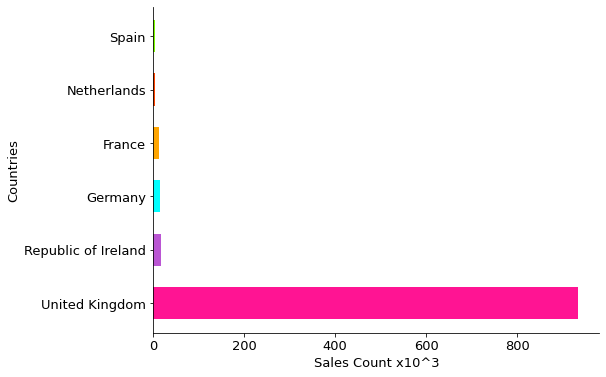

<Figure size 432x288 with 0 Axes>

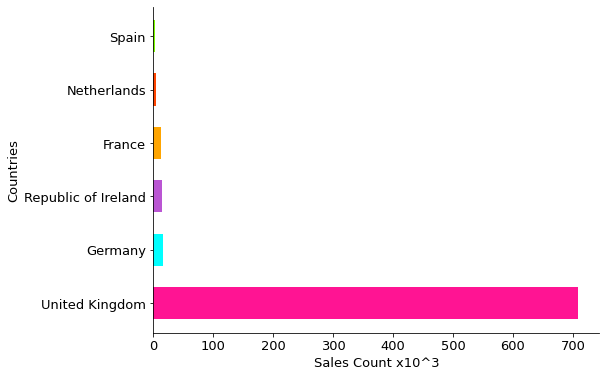

<Figure size 432x288 with 0 Axes>

In [ ]:
# Primary dataframe ---------------------------------------
# Displaying the data
fig, ax1 = plt.subplots(1, 1, figsize = (8, 6))
top6.plot(kind = 'barh' , label = '', zorder=2 , width = 0.6,
           color = ['deeppink', 'mediumorchid', 'cyan', 'orange', 'orangered',
                    'lawngreen'], linewidth = 1.2 )
plt.xlabel('Sales Count x10^3')
plt.ylabel('Countries')
#plt.suptitle('Top 6 Countries with highest number of purchases.')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax1.xaxis.set_major_formatter(tick) 
ax1.spines['top'].set_visible(False) # remove borders
ax1.spines['right'].set_visible(False)
#ax1.get_legend().remove()
#plt.legend(loc = 'upper right')
fig4 = plt.gcf()
plt.show()
plt.draw()

# Secondary dataframe -------------------------------------------------
# Displaying the data
fig, ax2 = plt.subplots(1, 1, figsize = (8, 6))
top6_2.plot(kind = 'barh' , label = '', zorder=2 , width = 0.6,
           color = ['deeppink', 'cyan', 'mediumorchid', 'orange', 'orangered',
                    'lawngreen'], linewidth = 1.2 )
plt.xlabel('Sales Count x10^3')
plt.ylabel('Countries')
#plt.suptitle('Top 6 Countries with highest number of purchases.')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax2.xaxis.set_major_formatter(tick) 
ax2.spines['top'].set_visible(False) # remove borders
ax2.spines['right'].set_visible(False)
#ax2.get_legend().remove()
fig5 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
# FIG 4
fig4.savefig('fig4_data_vis.png', dpi = 100)
#FIG 5
fig5.savefig('fig5_data_vis.png', dpi = 100)

In [ ]:
# Inquiry on the monthly revenue throughout the 24 months and 
# which country brings in the most revenue

# Primary dataframe ---------------------------------------
df_revenue = df
df_revenue['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst = True)
# Adding new columns and splitting the invoice date variable into its components
df_revenue['total_spend']= (df_revenue['Quantity'])*(df_revenue['Price (£)'])
df_revenue['date'] = df_revenue['InvoiceDate'].dt.date
df_revenue['day'] = df_revenue['InvoiceDate'].dt.day 
df_revenue['month'] = df_revenue['InvoiceDate'].dt.month 
df_revenue['year'] = df_revenue['InvoiceDate'].dt.year
df_revenue['hour'] = df_revenue['InvoiceDate'].dt.hour
df_revenue['week'] = df_revenue['InvoiceDate'].dt.week
df_revenue['minute'] = df_revenue['InvoiceDate'].dt.minute

# Secondary dataframe -------------------------------------------------
df_revenue_2 = df_no_unk
df_revenue_2['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst = True)
# Adding new columns and splitting the invoice date variable into its components
df_revenue_2['total_spend'] = (df_revenue_2['Quantity'])*(df_revenue_2['Price (£)'])
df_revenue_2['date'] = df_revenue_2['InvoiceDate'].dt.date
df_revenue_2['day'] = df_revenue_2['InvoiceDate'].dt.day 
df_revenue_2['month'] = df_revenue_2['InvoiceDate'].dt.month 
df_revenue_2['year'] = df_revenue_2['InvoiceDate'].dt.year
df_revenue_2['hour'] = df_revenue_2['InvoiceDate'].dt.hour
df_revenue_2['week'] = df_revenue_2['InvoiceDate'].dt.week
df_revenue_2['minute'] = df_revenue_2['InvoiceDate'].dt.minute

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value i

In [ ]:
# Creating new dataframe "sales" , shows the sum of all transaction spending
# in each one month.

# Primary dataframe ---------------------------------------
sales = df_revenue[['year', 'month',
                    'total_spend']].groupby(['year',
                                              'month']).sum().reset_index()
# setting day to be 1 to represent start of the month 
sales['day'] = 1
# convert 'date' to pd datetime object
sales['date'] = pd.to_datetime(sales[['year', 'month', 'day']])

# setting date as index
sales = sales.set_index('date')
# drop unncessary columns
sales = sales.drop(['day', 'month', 'year'], axis=1)

# Secondary dataframe -------------------------------------------------
sales_2 = df_revenue_2[['year', 'month',
                    'total_spend']].groupby(['year',
                                              'month']).sum().reset_index()
# setting day to be 1 to represent start of the month 
sales_2['day'] = 1
# convert 'date' to pd datetime object
sales_2['date'] = pd.to_datetime(sales_2[['year', 'month', 'day']])

# setting date as index
sales_2 = sales_2.set_index('date')
# drop unncessary columns
sales_2 = sales_2.drop(['day', 'month', 'year'], axis=1)

In [ ]:
# Needs to be a new dataframe for second visualisation

# Primary dataframe ---------------------------------------
country_revenue = df_revenue[['total_spend',
                              'Country']].groupby(['Country']).sum().reset_index().sort_values(by = 'total_spend', ascending = False)['Country'][1:8]

# Secondary dataframe -------------------------------------------------
country_revenue_2 = df_revenue_2[['total_spend',
                                  'Country']].groupby(['Country']).sum().reset_index().sort_values(by= 'total_spend', ascending = False)['Country'][1:8]

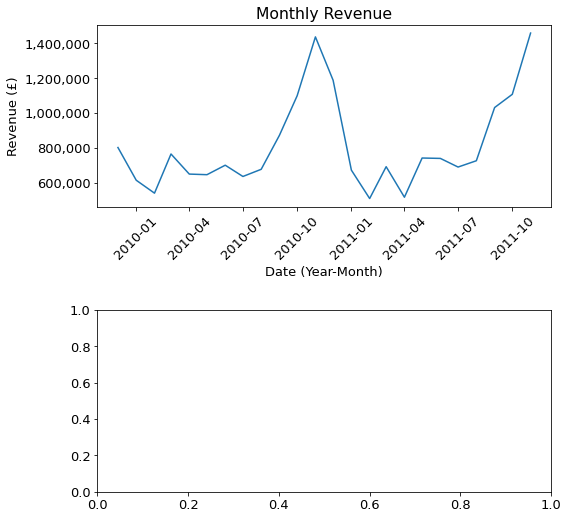

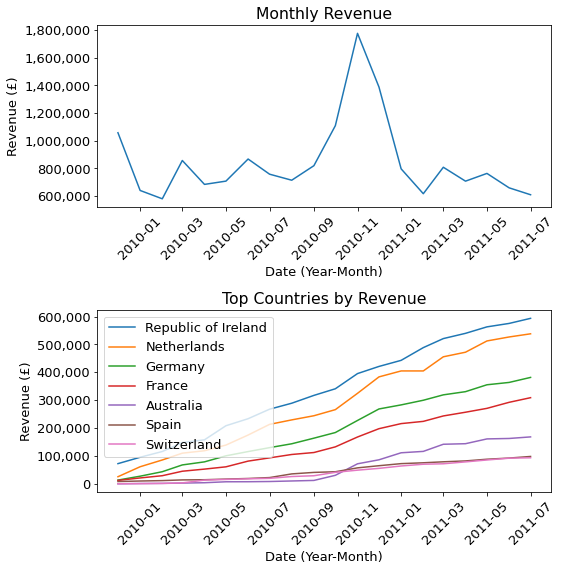

<Figure size 432x288 with 0 Axes>

In [ ]:
# Setting up a graph 
import matplotlib
# Primary dataframe ---------------------------------------
fig, ax5 = plt.subplots(2, 1, figsize = (9, 9))
fig.tight_layout(pad = 6.0)

# Secondary dataframe ---------------------------------------
fig_2, ax_2 = plt.subplots(2, 1, figsize = (9, 9))
fig_2.tight_layout(pad = 6.0)

# creating a plot for sales 

# Primary dataframe ---------------------------------------
ax5[0].plot(sales)
ax5[0].set_title('Monthly Revenue') 
ax5[0].set_xlabel('Date (Year-Month)')
ax5[0].set_ylabel('Revenue (£)')
ax5[0].tick_params(axis = 'x', labelrotation = 45) 
#ax[0].spines['top'].set_visible(False) # remove borders
#ax[0].spines['right'].set_visible(False)
# ridding scientific notation
ax5[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Secondary dataframe ---------------------------------------
ax_2[0].plot(sales_2)
ax_2[0].set_title('Monthly Revenue') 
ax_2[0].set_xlabel('Date (Year-Month)')
ax_2[0].set_ylabel('Revenue (£)')
ax_2[0].tick_params(axis = 'x', labelrotation = 45) 
#ax_2[0].spines['top'].set_visible(False) # remove borders
##ax_2[0].spines['right'].set_visible(False)
# ridding scientific notation
ax_2[0].get_yaxis().set_major_formatter(
    matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Designing a loop that itarates for each country for second graph

# Primary dataframe ---------------------------------------
#for c in country_revenue:
 #   sales = df_revenue[df_revenue['Country'] == c]
    # subgroup sales and group by year and month. 
  #  sales = sales[['year', 'month',
   #                 'total_spend']].groupby(['year',
   #                                         'month']).sum().reset_index()
    # repeating steps above 
 #   sales['day'] = 1
 #   sales['date'] = pd.to_datetime(sales[['day', 'month', 'year']])
  #  sales = sales.set_index('date')
 #   sales = sales.drop(['year', 'month', 'day'], axis=1)
     # plotting
 #   ax5[1].plot(sales.cumsum(), label = c)    
 #   ax5[1].legend(loc = 'best')
  #  ax5[1].set_title('Top Countries by Revenue')
 #   ax5[1].tick_params(axis = 'x', labelrotation = 45)          
 #   ax5[1].set_xlabel('Date (Year-Month)')
 #   ax5[1].set_ylabel('Revenue (£)')
 #   ax5[1].spines['top'].set_visible(False) # remove borders
 #   ax5[1].spines['right'].set_visible(False)
     # ridding scientific notation
  #  ax5[1].get_yaxis().set_major_formatter(
  #     matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
#fig6 = plt.gcf()
#plt.show()
#plt.draw()

# Secondary dataframe ---------------------------------------
for i in country_revenue_2:
    sales_2 = df_revenue_2[df_revenue_2['Country'] == i]
    # subgroup sales and group by year and month. 
    sales_2 = sales_2[['year', 'month',
                       'total_spend']].groupby(['year',
                                                'month']).sum().reset_index()
    # repeating steps above 
    sales_2['day'] = 1
    sales_2['date'] = pd.to_datetime(sales_2[['day', 'month', 'year']])
    sales_2 = sales_2.set_index('date')
    sales_2 = sales_2.drop(['year', 'month', 'day'], axis=1)
    # plotting
    ax_2[1].plot(sales_2.cumsum(), label= i)    
    ax_2[1].legend(loc = 'best')
    ax_2[1].set_title('Top Countries by Revenue')
    ax_2[1].tick_params(axis = 'x', labelrotation = 45)          
    ax_2[1].set_xlabel('Date (Year-Month)')
    ax_2[1].set_ylabel('Revenue (£)')
    #ax_2[1].spines['top'].set_visible(False) # remove borders
    #ax_2[1].spines['right'].set_visible(False)
    # ridding scientific notation
    ax_2[1].get_yaxis().set_major_formatter(
        matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
fig7 = plt.gcf()
plt.show()
plt.draw()

# to get bottom graph erase primary data loop 

# Analysis------------------------ EDIT------------------------------------------
# The Monthly Revenue graph show an upward trend between December 2010 and 
# November 2011. 


# The second graph shows the revenue by countries. The graph shows that the 
# country that brings the highest monthly revenue is Ireland, 
# followed by the Netherlands, Germany, and France. This is 
# interesting because even though the vast majority of orders are placed from 
# the United Kingdom, the latter is missing from the list of top 4 countries 
# that bring the most revenue.
# meaning the UK sales were low price retail purchases and the quantity of the
# products sold were probably low.

In [ ]:
# FIG 6
#fig6.savefig('fig6_data_vis', dpi =100)

In [ ]:
#FIG 7
fig7.savefig('fig7_data_vis', dpi =100)

In [ ]:
# Observing the most ordered items from the datasets 'description' variable.
# Primary dataframe ---------------------------------------
items_top10 = df['Description'].value_counts().head(10)
# Secondary dataframe ---------------------------------------
items_top10_2 = df_no_unk['Description'].value_counts().head(10)
# provides further insight into most orders items

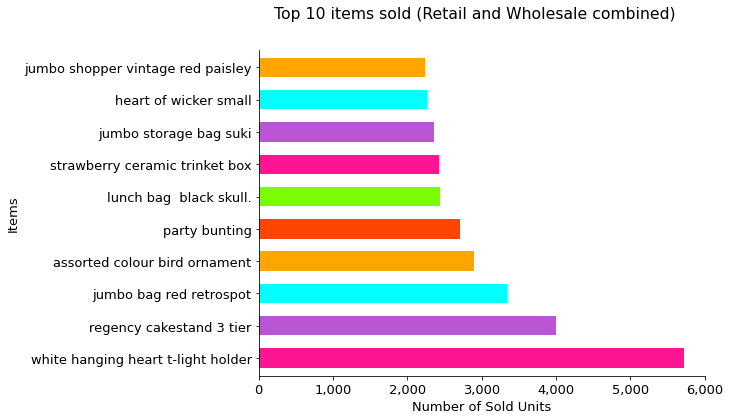

<Figure size 432x288 with 0 Axes>

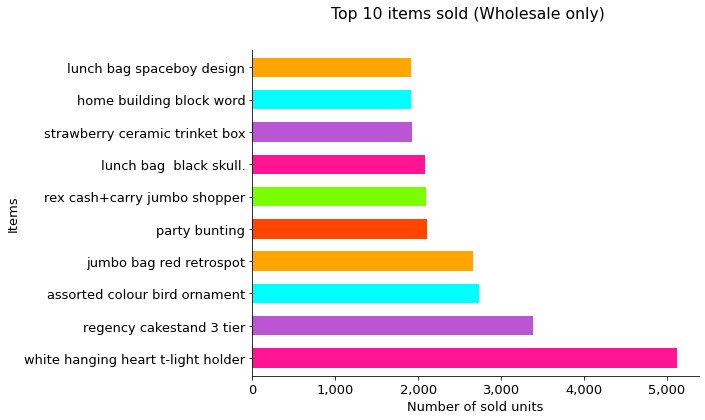

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot of top 10 item sales for both datasets
# Primary dataframe ---------------------------------------
fig, ax = plt.subplots(1, 1, figsize = (8, 6))
items_top10.plot(kind = 'barh' , zorder=2 , width = 0.6, label ='',
                 color = ['deeppink', 'mediumorchid', 'cyan', 'orange', 'orangered',
                          'lawngreen','deeppink', 'mediumorchid', 'cyan', 'orange'],
                 linewidth = 1.2 )
plt.xlabel('Number of Sold Units')
plt.ylabel('Items')
plt.suptitle('Top 10 items sold (Retail and Wholesale combined)')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax.xaxis.set_major_formatter(tick) 
ax.spines['top'].set_visible(False) # remove borders
ax.spines['right'].set_visible(False)
fig8 = plt.gcf()
plt.show()  
plt.draw()

# Secondary dataframe ---------------------------------------
fig, ax2 = plt.subplots(1, 1, figsize = (8, 6))
items_top10_2.plot(kind = 'barh' , zorder=2 , width = 0.6, label='',
                   color = ['deeppink', 'mediumorchid', 'cyan', 'orange', 'orangered',
                    'lawngreen','deeppink', 'mediumorchid', 'cyan', 'orange'],
                   linewidth = 1.2 )
plt.xlabel('Number of sold units')
plt.ylabel('Items')
plt.suptitle('Top 10 items sold (Wholesale only)')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax2.xaxis.set_major_formatter(tick) 
ax2.spines['top'].set_visible(False) # remove borders
ax2.spines['right'].set_visible(False)
fig9 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
# FIG 8
fig8.savefig('fig8_data_vis', dpi = 100)

In [ ]:
# FIG 9
fig9.savefig('fig9_data_vis', dpi = 100)

In [ ]:
# Introducing a total basket prices variable
df["total_price"] = df["Quantity"] * df["Price (£)"]
df_no_unk["total_price"] = df_no_unk["Quantity"] * df_no_unk["Price (£)"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
# Viewing the highest quantities ordered by individual customers,
# plus the amount of separate transactions

# Primary dataframe ---------------------------------------
df_quantity_invoice = df.groupby('Customer_ID').agg({'Invoice': lambda x: len(x),
                                         'Quantity': lambda x: x.sum(),
                                         'total_price': lambda x: x.sum()})
# renamng columns:
df_quantity_invoice.columns = ['Transactions', 'Units',
                               'Basket price']
print(df_quantity_invoice.head(3))

# Secondary dataframe ---------------------------------------
df_quantity_invoice_2 = df_no_unk.groupby('Customer_ID').agg({'Invoice': lambda x: len(x),
                                         'Quantity': lambda x: x.sum(),
                                         'total_price': lambda x: x.sum()})
# renamng columns:
df_quantity_invoice_2.columns = ['Transactions', 'Units',
                                 'Basket price']
print(df_quantity_invoice_2.head(3))

# Reference
#    Title: Customer Lifetime Value - Calculation
#    Author: ikbalarslan
#    Date: 12 Jun 2018
#    Code version: 1
#    Availability: https://www.kaggle.com/ikbalarslan/customer-lifetime-value-calculation

             Transactions  Units  Basket price
Customer_ID                                   
12346                  34  74285      77556.46
12347                 242   3094       5408.50
12348                  46   2704       1658.40
             Transactions  Units  Basket price
Customer_ID                                   
12346                  34  74285      77556.46
12347                 242   3094       5408.50
12348                  46   2704       1658.40


In [ ]:
# Visualising the difference in quantity units ordered with the amount
# of separate orders made

# Primary dataframe ---------------------------------------
df_quantity_invoice =  df_quantity_invoice.head(20) # top 20 customers
df_qv1 = df_quantity_invoice.sort_values("Transactions", ascending = False)
df_qv2 = df_quantity_invoice.sort_values("Units", ascending = False)
df_qv3 = df_quantity_invoice.sort_values("Basket price", ascending = False)
df_qv1 = df_qv1.drop(['Units', 'Basket price'], axis = 1) # dropping for clarity
df_qv2 = df_qv2.drop(['Transactions', 'Basket price'], axis = 1) # dropping for clarity
df_qv3 = df_qv3.drop(['Transactions', 'Units'], axis = 1)

# Secondary dataframe ---------------------------------------
df_quantity_invoice_2 =  df_quantity_invoice_2.head(20) # top 20 customers
df_qv1_2 = df_quantity_invoice_2.sort_values("Transactions", ascending = False)
df_qv2_2 = df_quantity_invoice_2.sort_values("Units", ascending = False)
df_qv3_2 = df_quantity_invoice_2.sort_values("Basket price", ascending = False)
df_qv1_2 = df_qv1_2.drop(['Units', 'Basket price'], axis = 1) # dropping for clarity
df_qv2_2 = df_qv2_2.drop(['Transactions', 'Basket price'], axis = 1) # dropping for clarity
df_qv3_2 = df_qv3_2.drop(['Transactions', 'Units'], axis = 1)

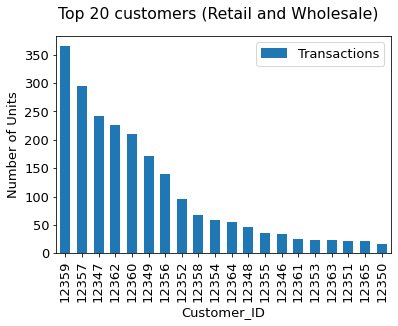

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting total quantity 

# Primary dataframe ---------------------------------------
#fig, ax = plt.subplots(1, 1, figsize = (8, 6))
df_qv1.plot(kind = 'bar', label = 'Units', zorder = 2 ,
            width = 0.6, linewidth = 1.2)
plt.xlabel('Customer_ID')
plt.ylabel('Number of Units')
plt.suptitle('Top 20 customers (Retail and Wholesale)')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax.yaxis.set_major_formatter(tick) 
ax.spines['top'].set_visible(False) # remove borders
ax.spines['right'].set_visible(False)
plt.legend(loc = 'best')
fig10 = plt.gcf()
plt.show()  
plt.draw()

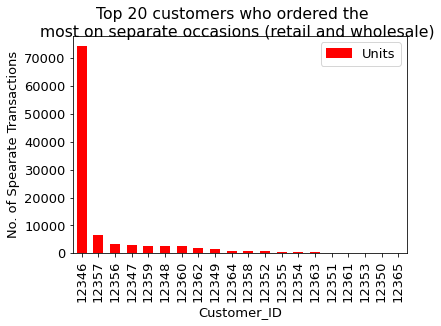

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting total number of separate orders 
# Primary dataframe ---------------------------------------
#fig, ax2 = plt.subplots(1, 1, figsize = (8, 6))
df_qv2.plot(kind = 'bar', label = 'Transactions',
            zorder = 2 , width = 0.6, color = 'red',
            linewidth = 1.2 )
plt.xlabel('Customer_ID')
plt.ylabel('No. of Spearate Transactions')
plt.suptitle('Top 20 customers who ordered the \n most on separate occasions (retail and wholesale)')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax2.yaxis.set_major_formatter(tick) 
ax2.spines['top'].set_visible(False) # remove borders
ax2.spines['right'].set_visible(False)
plt.legend(loc = 'best')
fig11 = plt.gcf()
plt.show()
plt.draw()  

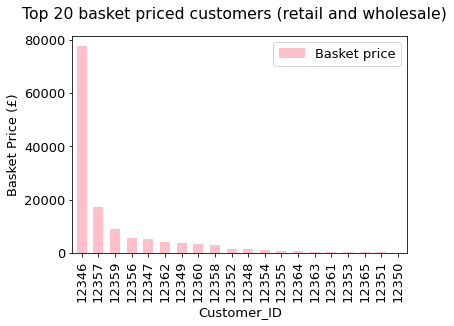

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting basket price
#fig, ax3 = plt.subplots(1, 1, figsize = (8, 6))
df_qv3.plot(kind = 'bar', label = 'Basket price',
            zorder = 2 , width = 0.6, color = 'pink',
            linewidth = 1.2 )
plt.xlabel('Customer_ID')
plt.ylabel('Basket Price (£)')
plt.suptitle('Top 20 basket priced customers (retail and wholesale)')
fmt = '{x:,.0f}'
font = {'family' : 'normal', 'size'   : 13}
matplotlib.rc('font', **font) # text size
tick = mtick.StrMethodFormatter(fmt) # ,
ax3.yaxis.set_major_formatter(tick) 
ax3.spines['top'].set_visible(False) # remove borders
ax3.spines['right'].set_visible(False)
plt.legend(loc = 'best')
fig12 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
#FIG 10
fig10.savefig('fig10_data_vis', dpi = 100)
#FIG 11
fig11.savefig('fig11_data_vis', dpi = 100)
# FIG 12
fig12.savefig('fig12_data_vis', dpi = 100)

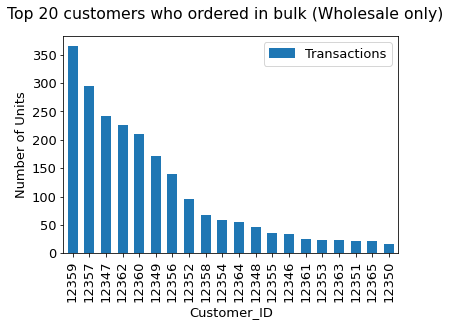

<Figure size 432x288 with 0 Axes>

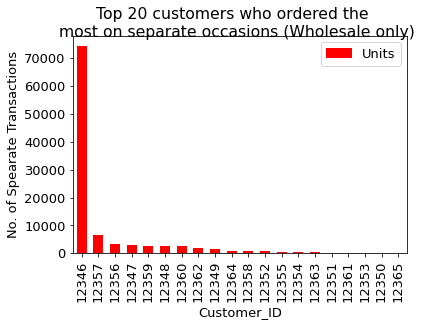

<Figure size 432x288 with 0 Axes>

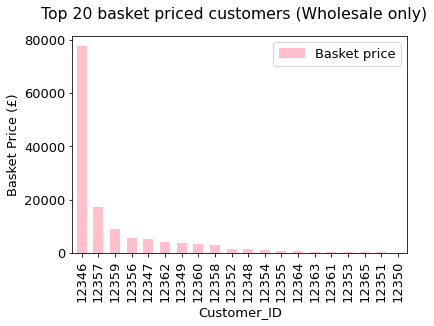

<Figure size 432x288 with 0 Axes>

In [ ]:
# plotting total quantity 
# Secondary dataframe ---------------------------------------
df_qv1_2.plot(kind = 'bar', label = '', zorder = 2 ,
            width = 0.6, linewidth = 1.2)
plt.xlabel('Customer_ID')
plt.ylabel('Number of Units')
plt.suptitle('Top 20 customers who ordered in bulk (Wholesale only)')
plt.legend(loc = 'best')
fig13 = plt.gcf()
plt.show()
plt.draw() 

# plotting total number of separate orders 
# Secondary dataframe ---------------------------------------
df_qv2_2.plot(kind = 'bar', label = '',
            zorder = 2 , width = 0.6, color = 'red',
            linewidth = 1.2 )
plt.xlabel('Customer_ID')
plt.ylabel('No. of Spearate Transactions')
plt.suptitle('Top 20 customers who ordered the \n most on separate occasions (Wholesale only)')
#plt.xlim()
plt.legend(loc = 'best')
fig14 = plt.gcf()
plt.show() 
plt.draw()

# plotting basket price
df_qv3_2.plot(kind = 'bar', label = '',
            zorder = 2 , width = 0.6, color = 'pink',
            linewidth = 1.2 )
plt.xlabel('Customer_ID')
plt.ylabel('Basket Price (£)')
plt.suptitle('Top 20 basket priced customers (Wholesale only)')
#plt.xlim()
plt.legend(loc = 'best')
fig15 = plt.gcf()
plt.show()
plt.draw()

In [ ]:
#FIG 13
fig13.savefig('fig12_data_vis', dpi = 100)
#FIG 14
fig14.savefig('fig13_data_vis', dpi = 100)
#FIG 15
fig15.savefig('fig13_data_vis', dpi = 100)

In [ ]:
# Justification in reducing customer group data so that 800k rows can be 
# computed int he DNN with the computer processing power available.

# As seen on figure 7 the top country of revenue is republic of ireland,
# and it's otmiles ahead in terms of difference with other country sales in 
# this data set it is ok to assume that the customers buying patterns are independant 
# on what country they are in. and taking the data from one or two countries
#  only can be a basis for other countries in europe more likely.

#df_gp = df_no_unk[df_no_unk['Customer ID'].isin(grouped['Customer ID'])]
df_gp = df_no_unk
k = df_gp[['Invoice', 'Country']].groupby('Country').count().sort_values("Invoice",
                                                             ascending = False)
print(k.tail(5))
k.head(5)

                Invoice
Country                
Korea                53
Lebanon              45
Nigeria              29
Czech Republic       24
Saudi Arabia          9


,Invoice
Country,
United Kingdom,708763
Germany,15742
Republic of Ireland,15390
France,13018
Netherlands,4902


In [ ]:
# Excludng all countries apart from UK and ireland
df_gp1 = df_gp[df_gp['Country'] == 'United Kingdom']
print(df_gp1.info())
df_gp2 = df_gp[df_gp['Country'] == 'Republic of Ireland']
print(df_gp2.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 708763 entries, 0 to 785716
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      708763 non-null  object        
 1   StockCode    708763 non-null  object        
 2   Description  708763 non-null  object        
 3   Quantity     708763 non-null  int64         
 4   InvoiceDate  708763 non-null  datetime64[ns]
 5   Price (£)    708763 non-null  float64       
 6   Customer_ID  708763 non-null  object        
 7   Country      708763 non-null  object        
 8   total_spend  708763 non-null  float64       
 9   date         708763 non-null  object        
 10  day          708763 non-null  int64         
 11  month        708763 non-null  int64         
 12  year         708763 non-null  int64         
 13  hour         708763 non-null  int64         
 14  week         708763 non-null  int64         
 15  minute       708763 non-null  int6

In [ ]:
# Joining the dataframes
import pandas as pd
df_gp = pd.concat([df_gp1, df_gp2], axis = 0, join = 'inner')
df_gp.shape

(724153, 17)

In [ ]:
df_gp = df_gp[df_gp['StockCode'] != 'C2']
df_gp.shape

(723914, 17)

In [ ]:
# Creating new dataframe for ordering customers in 'top spender' format
df_result = df_gp.groupby(['Customer_ID']).sum()['total_spend'].sort_values(ascending = False)
df_result = pd.DataFrame(df_result)
df_result.reset_index(level = 0, inplace = True)
df_result.sort_values('total_spend', ascending = False)

,Customer_ID,total_spend
0,18102,597336.11
1,14156,303578.63
2,14911,269825.69
3,17450,245410.69
4,13694,193351.65
...,...,...
5314,14095,2.95
5315,16446,2.90
5316,14827,0.00
5317,14103,0.00


In [ ]:
# Saving dataset to be visualised in R
# histogram or bar chart justifying the customer spend range of interest
#df_result.to_csv('df_result.csv', index = False)

In [ ]:
# Disregarding the customrs who spend less than £99 over 24 month period.
df_result = df_result[(df_result['total_spend'] >= 45)] # subject to change
df_result

,Customer_ID,total_spend
0,18102,597336.11
1,14156,303578.63
2,14911,269825.69
3,17450,245410.69
4,13694,193351.65
...,...,...
5255,18184,49.80
5256,16530,48.35
5257,13438,46.50
5258,15698,46.20


In [ ]:
# Finding the factors of the total amount of customers
r = df_result.shape[0]

def print_factors(x):
   print("The factors of" ,x, "are:")
   for i in range(1, x + 1):
       if x % i == 0:
           print(i)
print_factors(r)

# 4 classed customer spending groups will be derived for this study,
# ranging from the top spenders to the lowest.  

# Reference:
#    Title: Programiz
#    Author: Parewa Labs Pvt. Ltd. 
#    Date: 20 Aug 2018
#    Code version: 1
#    Availability: https://www.programiz.com/python-programming/examples/factor-number

The factors of 5260 are:
1
2
4
5
10
20
263
526
1052
1315
2630
5260


In [ ]:
a = df_result.iloc[:1315] 
# Incorporating above manipulation into wanted dataframe
customer_group_a = df_gp[df_gp['Customer_ID'].isin(a['Customer_ID'])]
customer_group_a .sort_values('total_spend', ascending = False, inplace = True)
# setting variable types
customer_group_a['Customer_ID'] = customer_group_a['Customer_ID'].astype('str')
customer_group_a['total_spend'] = customer_group_a['total_spend'].astype('int')
# dropping unnecessary columns
customer_group_a = customer_group_a.drop(["date", "day", "month", "year", "hour",
                                          "week", 'minute'], axis = 1)
# Removing 6 digit stock codes items are they are assumed as anomalies. 
customer_group_a['StockCode'] = customer_group_a['StockCode'].str[:5]
customer_group_a
# Resetting dataframe index 
customer_group_a.reset_index(drop = True, inplace = True)
customer_group_a.rename(columns = {'Price (£)': 'Price'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
customer_group_a['InvoiceDate']

0        2010-11-14 13:42:00
1        2011-01-11 11:32:00
2        2010-09-21 13:06:00
3        2010-04-28 13:26:00
4        2011-04-06 17:08:00
                 ...        
497282   2009-12-02 14:21:00
497283   2011-05-04 08:40:00
497284   2011-06-09 15:34:00
497285   2009-12-02 11:51:00
497286   2010-02-04 18:18:00
Name: InvoiceDate, Length: 497287, dtype: datetime64[ns]

In [ ]:
# Saving data to be used in DNN in R
#customer_group_a.to_csv('customer_group_a.csv', index = False)

In [ ]:
b = df_result.iloc[300:2630] 
# Incorporating above manipulation into wanted dataframe
customer_group_b = df_gp[df_gp['Customer_ID'].isin(b['Customer_ID'])]
customer_group_b .sort_values('total_spend', ascending = False, inplace = True)
# setting variable types
customer_group_b['Customer_ID'] = customer_group_b['Customer_ID'].astype('str')
customer_group_b['total_spend'] = customer_group_b['total_spend'].astype('int')
# dropping unnecessary columns
customer_group_b = customer_group_b.drop(["date", "day", "month", "year", "hour",
                                          "week",'minute'],
                                          axis = 1)
# Removing 6 digit stock codes items are they are assumed as anomalies. 
customer_group_b['StockCode'] = customer_group_b['StockCode'].str[:5]
# Resetting dataframe index 
customer_group_b.reset_index(drop = True, inplace = True)
customer_group_b.rename(columns = {'Price (£)': 'Price'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
customer_group_b

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,total_spend,total_price
0,554868,22197,small popcorn holder,4300,2010-12-21 13:06:00,0.72,13135,United Kingdom,3096,3096.00
1,515296,84078,set/4 white retro storage cubes,85,2010-05-25 13:21:00,34.95,13734,United Kingdom,2970,2970.75
2,515281,84078,set/4 white retro storage cubes,85,2010-05-25 12:46:00,34.95,13734,United Kingdom,2970,2970.75
3,523576,22423,regency cakestand 3 tier,256,2010-07-21 17:32:00,10.95,13205,United Kingdom,2803,2803.20
4,575582,85099,jumbo bag red retrospot,1000,2011-06-21 16:36:00,1.79,16986,United Kingdom,1790,1790.00
...,...,...,...,...,...,...,...,...,...,...
405507,574879,22625,red kitchen scales,2,2011-06-16 15:07:00,0.00,13014,United Kingdom,0,0.00
405508,527696,22121,noel wooden block letters,1,2010-08-29 13:58:00,0.00,13554,United Kingdom,0,0.00
405509,494607,21533,retro spot large milk jug,12,2009-12-18 10:25:00,0.00,16858,United Kingdom,0,0.00
405510,524701,22218,cake stand lace white,2,2010-08-01 13:07:00,0.00,17667,United Kingdom,0,0.00


In [ ]:
# Saving data to be used in DNN in R
#customer_group_b.to_csv('customer_group_b.csv', index = False)

In [ ]:
c = df_result.iloc[600:3945] 
# Incorporating above manipulation into wanted dataframe
customer_group_c = df_gp[df_gp['Customer_ID'].isin(c['Customer_ID'])]
customer_group_c .sort_values('total_spend', ascending = False, inplace = True)
# setting variable types
customer_group_c['Customer_ID'] = customer_group_c['Customer_ID'].astype('str')
customer_group_c['total_spend'] = customer_group_c['total_spend'].astype('int')
# dropping unnecessary columns
customer_group_c = customer_group_c.drop(["date", "day", "month", "year", "hour",
                                          "week",'minute'],
                                          axis = 1)
# Removing 6 digit stock codes items are they are assumed as anomalies. 
customer_group_c['StockCode'] = customer_group_c['StockCode'].str[:5]
# Resetting dataframe index 
customer_group_c.reset_index(drop = True, inplace = True)
customer_group_c.rename(columns = {'Price (£)': 'Price'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
customer_group_c

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,total_spend,total_price
0,554868,22197,small popcorn holder,4300,2010-12-21 13:06:00,0.72,13135,United Kingdom,3096,3096.0
1,523576,22423,regency cakestand 3 tier,256,2010-07-21 17:32:00,10.95,13205,United Kingdom,2803,2803.2
2,502333,79341,willow branch lights.,288,2010-02-24 15:03:00,5.45,16077,United Kingdom,1569,1569.6
3,530981,21890,s/6 wooden skittles in cotton bag,500,2010-09-22 16:34:00,2.55,17876,United Kingdom,1275,1275.0
4,522124,22556,plasters in tin circus parade,876,2010-07-08 20:00:00,1.45,17308,United Kingdom,1270,1270.2
...,...,...,...,...,...,...,...,...,...,...
353545,548871,22162,heart garland rustic padded,2,2010-12-07 15:28:00,0.00,14410,United Kingdom,0,0.0
353546,531361,21843,red retrospot cake stand,2,2010-09-24 13:06:00,0.00,12820,United Kingdom,0,0.0
353547,539263,22580,advent calendar gingham sack,4,2010-11-08 16:07:00,0.00,16560,United Kingdom,0,0.0
353548,577129,22464,hanging metal heart lantern,4,2011-07-07 14:03:00,0.00,15602,United Kingdom,0,0.0


In [ ]:
# Saving data to be used in DNN in R
#customer_group_c.to_csv('customer_group_c.csv', index = False)

In [ ]:
d = df_result.iloc[600:5260] 
# Incorporating above manipulation into wanted dataframe
customer_group_d = df_gp[df_gp['Customer_ID'].isin(d['Customer_ID'])]
customer_group_d .sort_values('total_spend', ascending = False, inplace = True)
# setting variable types
customer_group_d['Customer_ID'] = customer_group_d['Customer_ID'].astype('str')
customer_group_d['total_spend'] = customer_group_d['total_spend'].astype('int')
# dropping unnecessary columns
customer_group_d = customer_group_d.drop(["date", "day", "month", "year", "hour",
                                          "week",'minute'],
                                          axis = 1)
# Removing 6 digit stock codes items are they are assumed as anomalies. 
customer_group_d['StockCode'] = customer_group_d['StockCode'].str[:5]
# Resetting dataframe index 
customer_group_d.reset_index(drop = True, inplace = True)
customer_group_d.rename(columns = {'Price (£)': 'Price'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [ ]:
customer_group_d

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country,total_spend,total_price
0,554868,22197,small popcorn holder,4300,2010-12-21 13:06:00,0.72,13135,United Kingdom,3096,3096.0
1,523576,22423,regency cakestand 3 tier,256,2010-07-21 17:32:00,10.95,13205,United Kingdom,2803,2803.2
2,502333,79341,willow branch lights.,288,2010-02-24 15:03:00,5.45,16077,United Kingdom,1569,1569.6
3,530981,21890,s/6 wooden skittles in cotton bag,500,2010-09-22 16:34:00,2.55,17876,United Kingdom,1275,1275.0
4,522124,22555,plasters in tin strongman,876,2010-07-08 20:00:00,1.45,17308,United Kingdom,1270,1270.2
...,...,...,...,...,...,...,...,...,...,...
377572,553000,47566,party bunting,4,2010-12-10 15:17:00,0.00,17667,United Kingdom,0,0.0
377573,569716,22778,glass cloche small,2,2011-05-04 08:40:00,0.00,15804,United Kingdom,0,0.0
377574,572893,21208,pastel colour honeycomb fan,5,2011-05-31 09:36:00,0.00,18059,United Kingdom,0,0.0
377575,516304,22690,doormat home sweet home blue,6,2010-06-01 15:05:00,0.00,14025,United Kingdom,0,0.0


In [ ]:
# Saving data to be used in DNN in R
customer_group_d.to_csv('customer_group_d.csv', index = False)

## Customer lifetime value calculation





In [ ]:
# Citing Computer Code in the Source Code

#*    Title: GraphicsDrawer source code
#*    Author: Smith, J
##*    Date: 2011
#*    Code version: 2.0
#*    Availability: http://www.graphicsdrawer.com